In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("StudentsPerformance.csv")
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
dataset.shape

(1000, 8)

In [4]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
dataset.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

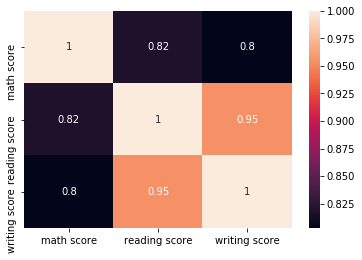

In [8]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True)

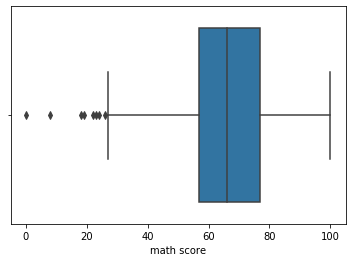

In [9]:
import seaborn as sns
sns.boxplot(dataset['math score'])

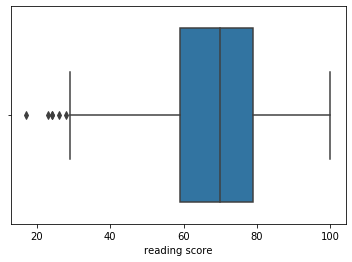

In [10]:
import seaborn as sns
sns.boxplot(dataset['reading score'])

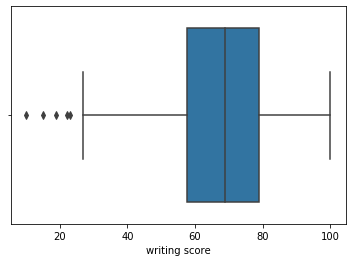

In [11]:
import seaborn as sns
sns.boxplot(dataset['writing score'])

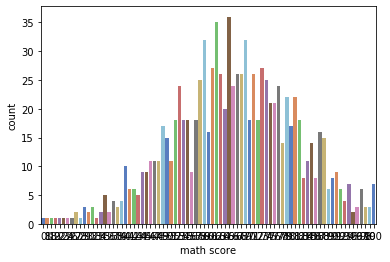

In [12]:
p = sns.countplot(x="math score", data = dataset,palette = "muted")

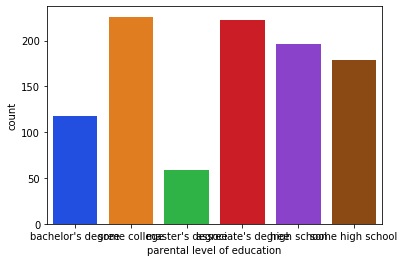

In [13]:
p = sns.countplot(x='parental level of education', data = dataset,  palette='bright')

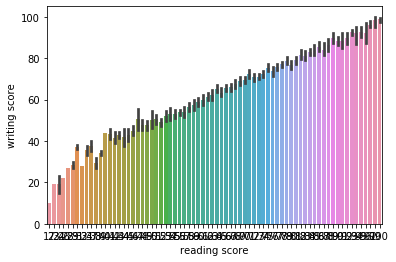

In [14]:
sns.barplot(x="reading score",y="writing score",data=dataset)

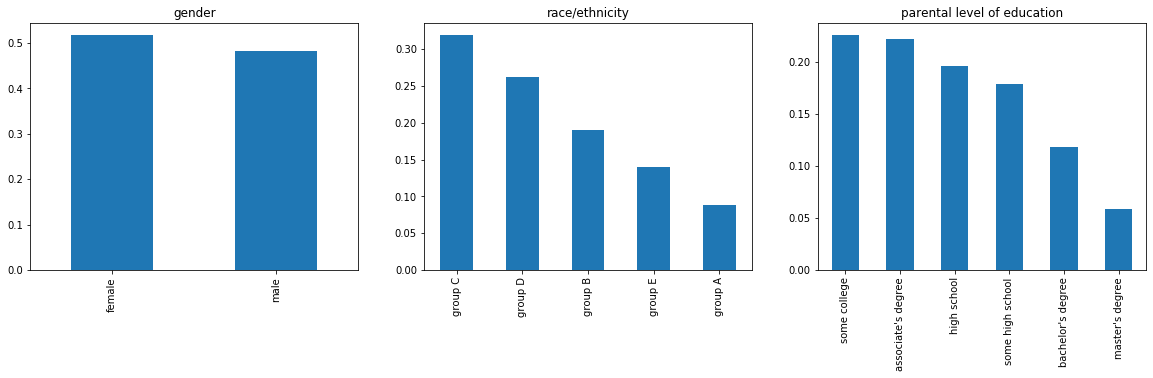

In [15]:
plt.subplot(231)
dataset['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'gender')

plt.subplot(232)
dataset['race/ethnicity'].value_counts(normalize=True).plot.bar(title= 'race/ethnicity')

plt.subplot(233)
dataset['parental level of education'].value_counts(normalize=True).plot.bar(title= 'parental level of education')

plt.show()

In [16]:
dataset["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [17]:
dataset["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [18]:
dataset["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [19]:
dataset["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [20]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
passing_marks=40

In [22]:
dataset['Math_PassStatus'] = np.where(dataset['math score']<passing_marks, 'F', 'P')
dataset.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

In [23]:
dataset['Reading_PassStatus'] = np.where(dataset['reading score']<passing_marks, 'F', 'P')
dataset.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

In [24]:
dataset['Writing_PassStatus'] = np.where(dataset['writing score']<passing_marks, 'F', 'P')
dataset.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

In [25]:
dataset['Overall_PassStatus'] = dataset.apply(lambda x : 'F' if x['Math_PassStatus']=='F' or 
                                              x['Reading_PassStatus']=='F' or x['Writing_PassStatus']=='F' else 'P',axis=1)

In [26]:
dataset.Overall_PassStatus.value_counts()

P    949
F     51
Name: Overall_PassStatus, dtype: int64

In [27]:
dataset['Total_marks'] = dataset['math score']+dataset['reading score']+dataset['writing score']
dataset['Percentage']=dataset['Total_marks']/3

In [28]:
def getgrade(Percentage,Overall_PassStatus):
    if(Overall_PassStatus =='F'):
        return 'F'
    if(Percentage>=80):
        return 'A'
    if(Percentage>=70):
        return 'B'
    if(Percentage>=60):
        return 'C'
    if(Percentage>=50):
        return 'D'
    if(Percentage>=40):
        return 'E'
    else:
        return 'F'
dataset['Grade']=dataset.apply(lambda x : getgrade(x['Percentage'],x['Overall_PassStatus']),axis=1)

In [29]:
dataset.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

In [30]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,148,49.333333,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,229,76.333333,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P,282,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P,172,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P,195,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P,223,74.333333,B


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["gender"]=le.fit_transform(dataset["gender"])
dataset["race/ethnicity"]=le.fit_transform(dataset["race/ethnicity"])
dataset["parental level of education"]=le.fit_transform(dataset["parental level of education"])
dataset["lunch"]=le.fit_transform(dataset["lunch"])
dataset["test preparation course"]=le.fit_transform(dataset["test preparation course"])
dataset["Grade"]=le.fit_transform(dataset["Grade"])

In [32]:
dataset.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,Overall_PassStatus,Total_marks,Percentage,Grade
0,0,1,1,1,1,72,72,74,P,P,P,P,218,72.666667,1
1,0,2,4,1,0,69,90,88,P,P,P,P,247,82.333333,0


In [33]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:,14:15].values

In [34]:
x.shape

(1000, 8)

In [35]:
y.shape

(1000, 1)

In [36]:
x

array([[ 0,  1,  1, ..., 72, 72, 74],
       [ 0,  2,  4, ..., 69, 90, 88],
       [ 0,  1,  3, ..., 90, 95, 93],
       ...,
       [ 0,  2,  2, ..., 59, 71, 65],
       [ 0,  3,  4, ..., 68, 78, 77],
       [ 0,  3,  4, ..., 77, 86, 86]], dtype=int64)

In [37]:
y

array([[1],
       [0],
       [0],
       [4],
       [1],
       [1],
       [0],
       [5],
       [2],
       [5],
       [3],
       [4],
       [1],
       [1],
       [3],
       [1],
       [0],
       [5],
       [4],
       [3],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [5],
       [0],
       [0],
       [1],
       [3],
       [0],
       [3],
       [3],
       [2],
       [3],
       [2],
       [3],
       [3],
       [2],
       [1],
       [2],
       [0],
       [3],
       [1],
       [4],
       [0],
       [0],
       [5],
       [0],
       [3],
       [3],
       [5],
       [1],
       [5],
       [3],
       [1],
       [3],
       [2],
       [5],
       [2],
       [3],
       [5],
       [2],
       [2],
       [4],
       [3],
       [4],
       [5],
       [5],
       [1],
       [2],
       [2],
       [4],
       [4],
       [3],
    

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state =0)

In [39]:
x_train.shape

(800, 8)

In [40]:
y_train.shape

(800, 1)

In [41]:
x_test.shape

(200, 8)

In [42]:
y_test.shape

(200, 1)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train

array([[ 1.04868371,  0.71210873, -1.37207862, ...,  0.71271928,
         0.59195828,  0.31345224],
       [-0.95357636,  0.71210873,  0.25569631, ...,  0.51508482,
         0.66077063,  0.90580292],
       [ 1.04868371,  1.57136512, -1.37207862, ..., -0.27545303,
        -0.92191352, -1.00288261],
       ...,
       [-0.95357636, -0.14714766,  1.3408796 , ..., -1.46125981,
        -1.26597529, -0.87124913],
       [ 1.04868371,  0.71210873,  1.3408796 , ...,  0.44920666,
        -0.23378997, -0.41053193],
       [ 1.04868371, -1.00640405,  0.79828796, ..., -0.27545303,
        -0.23378997, -0.01563148]])

In [44]:
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
lpred = logistic.predict(x_test)

In [47]:
lpred

array([1, 1, 4, 2, 1, 1, 1, 4, 0, 4, 3, 2, 0, 0, 3, 5, 3, 0, 3, 0, 2, 3,
       1, 2, 3, 2, 2, 3, 2, 0, 1, 0, 0, 3, 3, 0, 0, 2, 1, 1, 2, 3, 2, 1,
       1, 3, 0, 2, 0, 3, 4, 2, 3, 3, 4, 1, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2,
       1, 3, 2, 3, 1, 0, 1, 2, 3, 2, 1, 1, 5, 1, 1, 0, 1, 0, 2, 1, 2, 0,
       1, 3, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 5, 0, 2, 5, 1, 1, 1, 2, 3, 0,
       1, 1, 5, 3, 1, 1, 0, 1, 0, 2, 3, 1, 0, 0, 1, 3, 1, 1, 1, 2, 2, 2,
       5, 0, 0, 2, 2, 2, 2, 0, 1, 2, 3, 2, 1, 5, 5, 4, 0, 0, 3, 1, 0, 1,
       1, 0, 3, 3, 3, 3, 0, 3, 3, 0, 2, 1, 1, 1, 3, 2, 3, 2, 5, 2, 0, 2,
       1, 3, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 4, 3, 2, 3, 1, 3, 2, 0, 0,
       1, 2])

In [48]:
y_test

array([[2],
       [1],
       [4],
       [2],
       [1],
       [1],
       [1],
       [4],
       [0],
       [5],
       [3],
       [2],
       [0],
       [0],
       [3],
       [5],
       [3],
       [0],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [3],
       [0],
       [2],
       [0],
       [3],
       [5],
       [2],
       [4],
       [3],
       [5],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [3],
       [1],
       [0],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [5],
       [1],
       [1],
       [0],
       [2],
    

In [49]:
from sklearn.metrics import accuracy_score
laccurracy = accuracy_score(y_test,lpred)

In [50]:
laccurracy

0.905

In [51]:
from sklearn.metrics import confusion_matrix
lcm = confusion_matrix(y_test,lpred)

In [52]:
lcm

array([[37,  1,  0,  0,  0,  0],
       [ 2, 46,  0,  0,  0,  0],
       [ 0,  7, 49,  0,  0,  0],
       [ 0,  0,  3, 36,  0,  0],
       [ 0,  0,  0,  3,  4,  0],
       [ 0,  0,  0,  0,  3,  9]], dtype=int64)

Text(33.0, 0.5, 'True')

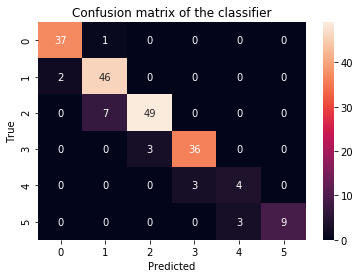

In [53]:
sns.heatmap(lcm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [54]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,lpred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.85      0.96      0.90        48
           2       0.94      0.88      0.91        56
           3       0.92      0.92      0.92        39
           4       0.57      0.57      0.57         7
           5       1.00      0.75      0.86        12

    accuracy                           0.91       200
   macro avg       0.87      0.84      0.85       200
weighted avg       0.91      0.91      0.90       200



In [55]:
from sklearn.tree import  DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [56]:
dpred = decisiontree.predict(x_test)

In [57]:
dpred

array([2, 1, 4, 2, 1, 1, 1, 4, 0, 5, 3, 2, 0, 0, 3, 5, 3, 0, 3, 0, 2, 3,
       1, 2, 4, 2, 2, 4, 2, 0, 1, 0, 0, 3, 3, 0, 0, 3, 1, 1, 1, 3, 1, 1,
       1, 3, 0, 2, 0, 3, 5, 2, 3, 3, 5, 1, 3, 2, 1, 2, 2, 1, 4, 1, 2, 2,
       1, 3, 2, 3, 1, 0, 1, 2, 3, 2, 1, 1, 5, 1, 1, 0, 2, 0, 2, 1, 2, 0,
       1, 3, 1, 2, 2, 2, 0, 1, 3, 2, 2, 2, 5, 0, 2, 5, 1, 1, 1, 2, 3, 0,
       2, 1, 5, 3, 2, 1, 0, 1, 0, 3, 3, 1, 0, 0, 1, 3, 1, 1, 1, 2, 2, 2,
       5, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 3, 1, 5, 5, 4, 0, 0, 3, 1, 0, 2,
       1, 0, 3, 3, 3, 3, 0, 3, 3, 0, 2, 1, 1, 2, 3, 2, 3, 2, 5, 2, 0, 2,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 4, 3, 3, 3, 1, 3, 2, 0, 0,
       1, 2])

In [58]:
y_test

array([[2],
       [1],
       [4],
       [2],
       [1],
       [1],
       [1],
       [4],
       [0],
       [5],
       [3],
       [2],
       [0],
       [0],
       [3],
       [5],
       [3],
       [0],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [3],
       [0],
       [2],
       [0],
       [3],
       [5],
       [2],
       [4],
       [3],
       [5],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [3],
       [1],
       [0],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [5],
       [1],
       [1],
       [0],
       [2],
    

In [59]:
daccuracy = accuracy_score(y_test,dpred)

In [60]:
daccuracy

0.895

In [61]:
dcm = confusion_matrix(y_test,dpred)
dcm

array([[37,  1,  0,  0,  0,  0],
       [ 2, 44,  2,  0,  0,  0],
       [ 0,  6, 47,  3,  0,  0],
       [ 0,  0,  3, 34,  2,  0],
       [ 0,  0,  0,  2,  5,  0],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

Text(33.0, 0.5, 'True')

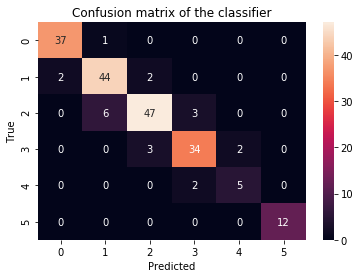

In [62]:
sns.heatmap(dcm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [63]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10,criterion = "entropy",random_state = 0 )
random.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
rpred = random.predict(x_test)
rpred

array([2, 1, 4, 2, 1, 1, 1, 4, 0, 5, 3, 2, 0, 0, 3, 5, 3, 0, 3, 1, 2, 3,
       1, 2, 4, 2, 2, 4, 2, 0, 0, 0, 0, 2, 3, 0, 0, 3, 1, 1, 1, 3, 1, 1,
       0, 3, 0, 2, 0, 3, 5, 2, 3, 3, 4, 1, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2,
       1, 3, 2, 3, 1, 0, 1, 2, 3, 2, 1, 1, 5, 1, 1, 0, 1, 0, 2, 1, 2, 0,
       1, 3, 1, 2, 2, 2, 1, 1, 4, 2, 2, 2, 3, 0, 2, 5, 1, 1, 1, 2, 3, 0,
       1, 1, 5, 3, 1, 1, 0, 1, 0, 2, 3, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1,
       5, 0, 0, 3, 2, 2, 2, 0, 1, 2, 3, 3, 1, 5, 5, 4, 0, 0, 3, 1, 0, 1,
       1, 0, 3, 3, 3, 3, 0, 3, 3, 0, 1, 1, 1, 2, 3, 2, 3, 2, 5, 2, 0, 1,
       1, 3, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 4, 3, 2, 3, 1, 2, 2, 0, 0,
       1, 2])

In [65]:
y_test

array([[2],
       [1],
       [4],
       [2],
       [1],
       [1],
       [1],
       [4],
       [0],
       [5],
       [3],
       [2],
       [0],
       [0],
       [3],
       [5],
       [3],
       [0],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [3],
       [0],
       [2],
       [0],
       [3],
       [5],
       [2],
       [4],
       [3],
       [5],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [3],
       [1],
       [0],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [5],
       [1],
       [1],
       [0],
       [2],
    

In [66]:
raccuracy = accuracy_score(y_test,rpred)

In [67]:
raccuracy

0.845

In [68]:
rcm = confusion_matrix(y_test,rpred)
rcm

array([[38,  0,  0,  0,  0,  0],
       [ 2, 45,  1,  0,  0,  0],
       [ 0, 13, 40,  3,  0,  0],
       [ 0,  0,  6, 31,  2,  0],
       [ 0,  0,  0,  2,  5,  0],
       [ 0,  0,  0,  1,  1, 10]], dtype=int64)

Text(33.0, 0.5, 'True')

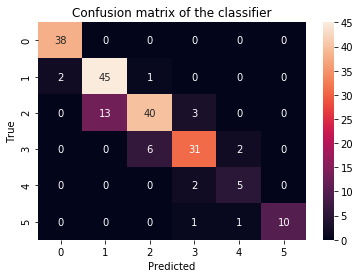

In [69]:
# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(rcm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,metric = "minkowski" , p = 2)
knn.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
kpred = knn.predict(x_test)
kpred

array([1, 1, 4, 2, 1, 1, 1, 4, 0, 4, 3, 2, 0, 0, 2, 5, 3, 0, 3, 0, 2, 3,
       1, 2, 3, 2, 3, 3, 2, 0, 0, 0, 0, 2, 3, 0, 0, 2, 1, 1, 1, 3, 2, 1,
       1, 2, 0, 2, 0, 3, 4, 3, 3, 2, 4, 1, 3, 2, 0, 3, 2, 1, 3, 1, 2, 2,
       1, 3, 1, 3, 1, 1, 1, 1, 3, 2, 1, 1, 5, 1, 0, 0, 1, 0, 2, 1, 2, 0,
       1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 2, 2, 4, 1, 2, 3, 1, 1, 1, 2, 3, 0,
       1, 1, 5, 3, 2, 1, 1, 1, 0, 2, 3, 1, 0, 1, 1, 3, 1, 1, 1, 2, 2, 2,
       5, 0, 0, 3, 2, 2, 1, 0, 1, 2, 2, 2, 1, 5, 3, 4, 1, 0, 4, 1, 0, 1,
       1, 1, 3, 2, 3, 3, 0, 3, 4, 0, 2, 1, 1, 2, 2, 2, 3, 1, 5, 2, 0, 1,
       1, 2, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 4, 3, 2, 3, 1, 3, 2, 1, 0,
       1, 2])

In [72]:
y_test

array([[2],
       [1],
       [4],
       [2],
       [1],
       [1],
       [1],
       [4],
       [0],
       [5],
       [3],
       [2],
       [0],
       [0],
       [3],
       [5],
       [3],
       [0],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [3],
       [0],
       [2],
       [0],
       [3],
       [5],
       [2],
       [4],
       [3],
       [5],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [3],
       [1],
       [0],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [5],
       [1],
       [1],
       [0],
       [2],
    

In [73]:
from sklearn.metrics import accuracy_score
kaccuracy = accuracy_score(y_test,kpred)
kaccuracy

0.745

In [74]:
from sklearn.metrics import confusion_matrix
kcm = confusion_matrix(y_test,kpred)
kcm

array([[31,  7,  0,  0,  0,  0],
       [ 4, 41,  3,  0,  0,  0],
       [ 0, 13, 38,  5,  0,  0],
       [ 0,  0, 10, 28,  1,  0],
       [ 0,  0,  0,  2,  5,  0],
       [ 0,  0,  0,  2,  4,  6]], dtype=int64)

Text(33.0, 0.5, 'True')

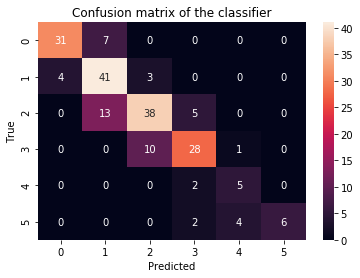

In [75]:
sns.heatmap(kcm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [76]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [77]:
npred=naive.predict(x_test)

In [78]:
npred

array([1, 1, 4, 2, 1, 1, 1, 4, 0, 5, 3, 2, 0, 0, 3, 5, 3, 0, 3, 1, 2, 3,
       1, 2, 4, 2, 3, 4, 2, 0, 0, 0, 0, 3, 3, 0, 0, 3, 1, 1, 2, 3, 2, 1,
       1, 2, 0, 2, 0, 3, 4, 2, 3, 3, 4, 1, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2,
       1, 3, 2, 3, 1, 0, 1, 2, 3, 2, 1, 1, 5, 1, 1, 0, 1, 0, 2, 1, 2, 0,
       1, 3, 1, 2, 2, 3, 1, 1, 3, 2, 2, 2, 4, 0, 2, 4, 1, 1, 1, 2, 3, 0,
       1, 1, 5, 3, 1, 1, 1, 1, 0, 2, 3, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2,
       5, 0, 0, 2, 2, 2, 1, 0, 1, 2, 3, 3, 1, 5, 5, 4, 0, 0, 4, 1, 0, 1,
       1, 1, 3, 3, 3, 3, 0, 3, 3, 0, 2, 1, 1, 2, 3, 2, 3, 2, 5, 2, 0, 2,
       2, 3, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 4, 4, 2, 3, 1, 3, 2, 0, 0,
       1, 2])

In [79]:
y_test

array([[2],
       [1],
       [4],
       [2],
       [1],
       [1],
       [1],
       [4],
       [0],
       [5],
       [3],
       [2],
       [0],
       [0],
       [3],
       [5],
       [3],
       [0],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [3],
       [0],
       [2],
       [0],
       [3],
       [5],
       [2],
       [4],
       [3],
       [5],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [3],
       [1],
       [0],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [5],
       [1],
       [1],
       [0],
       [2],
    

In [80]:
naccuracy=accuracy_score(y_test,npred)
naccuracy

0.875

In [81]:
ncm=confusion_matrix(y_test,npred)

In [82]:
ncm

array([[36,  2,  0,  0,  0,  0],
       [ 1, 46,  1,  0,  0,  0],
       [ 0,  7, 46,  3,  0,  0],
       [ 0,  0,  4, 33,  2,  0],
       [ 0,  0,  0,  1,  6,  0],
       [ 0,  0,  0,  0,  4,  8]], dtype=int64)

Text(33.0, 0.5, 'True')

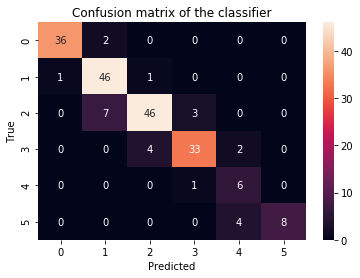

In [83]:
# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(ncm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [84]:
# Import and build Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(kernel='linear') # Linear Kernel
svm.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
y_pred = svm.predict(x_test)

In [86]:
y_pred

array([1, 1, 4, 2, 1, 1, 1, 4, 0, 4, 3, 2, 0, 0, 3, 5, 3, 0, 3, 0, 2, 3,
       1, 2, 4, 2, 3, 3, 2, 0, 0, 0, 0, 3, 3, 0, 0, 2, 1, 1, 2, 3, 1, 1,
       1, 3, 0, 2, 0, 3, 4, 2, 3, 3, 5, 1, 3, 2, 1, 2, 2, 1, 3, 1, 2, 2,
       1, 3, 2, 3, 1, 0, 1, 2, 3, 2, 1, 1, 5, 1, 1, 0, 2, 0, 2, 1, 2, 0,
       1, 3, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 5, 0, 2, 5, 1, 1, 1, 2, 3, 0,
       2, 1, 5, 3, 2, 1, 0, 1, 0, 2, 3, 1, 0, 0, 1, 3, 1, 1, 1, 2, 2, 2,
       5, 0, 0, 2, 2, 2, 2, 0, 1, 2, 3, 2, 1, 5, 5, 4, 0, 0, 3, 1, 0, 1,
       1, 0, 3, 3, 3, 3, 0, 3, 3, 0, 2, 1, 1, 1, 3, 2, 3, 2, 5, 2, 0, 2,
       1, 3, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 1, 4, 3, 2, 3, 1, 3, 2, 0, 0,
       1, 2])

In [87]:
y_test

array([[2],
       [1],
       [4],
       [2],
       [1],
       [1],
       [1],
       [4],
       [0],
       [5],
       [3],
       [2],
       [0],
       [0],
       [3],
       [5],
       [3],
       [0],
       [3],
       [1],
       [2],
       [3],
       [1],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [3],
       [3],
       [0],
       [0],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [3],
       [0],
       [2],
       [0],
       [3],
       [5],
       [2],
       [4],
       [3],
       [5],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [2],
       [3],
       [1],
       [0],
       [1],
       [2],
       [3],
       [2],
       [1],
       [1],
       [5],
       [1],
       [1],
       [0],
       [2],
    

In [88]:
saccuracy=accuracy_score(y_test,y_pred)

In [89]:
saccuracy

0.935

In [90]:
scm=confusion_matrix(y_test,y_pred)

In [91]:
scm

array([[38,  0,  0,  0,  0,  0],
       [ 2, 46,  0,  0,  0,  0],
       [ 0,  5, 51,  0,  0,  0],
       [ 0,  0,  2, 37,  0,  0],
       [ 0,  0,  0,  2,  5,  0],
       [ 0,  0,  0,  0,  2, 10]], dtype=int64)

Text(33.0, 0.5, 'True')

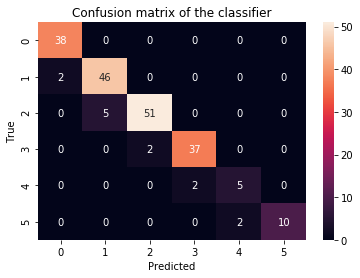

In [92]:
# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(scm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [93]:
import pickle
pickle.dump(svm,open("Grade.pkl","wb"))